<a href="https://colab.research.google.com/github/shravanisorte2003/Machine-Learning-Models/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json


Importing Face Mask Dataset

kaggle datasets download -d omkargurav/face-mask-dataset

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 97% 159M/163M [00:01<00:00, 173MB/s]
100% 163M/163M [00:01<00:00, 143MB/s]


In [ ]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


#!ls is to list your directory

In [ ]:
!ls

 data   face-mask-dataset.zip  'kaggle (1).json'   sample_data


**Importing the Dependencies**

Importing os-->to access the files we have in folders

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg #to visualiza the image
import cv2
from google.colab.patches import cv2_imshow #create new window and displays
from PIL import Image #pillow lib another img processing lib to read img and all
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3397.jpg', 'with_mask_2584.jpg', 'with_mask_3250.jpg', 'with_mask_2790.jpg', 'with_mask_1630.jpg']
['with_mask_897.jpg', 'with_mask_806.jpg', 'with_mask_3673.jpg', 'with_mask_3133.jpg', 'with_mask_2499.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:]) #first 5 file names and last 5 file names

['without_mask_1177.jpg', 'without_mask_2317.jpg', 'without_mask_3029.jpg', 'without_mask_3277.jpg', 'without_mask_155.jpg']
['without_mask_3714.jpg', 'without_mask_2257.jpg', 'without_mask_2589.jpg', 'without_mask_3272.jpg', 'without_mask_1185.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [ ]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

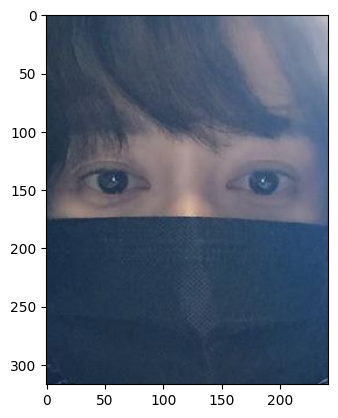

In [ ]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1134.jpg')
imgplot = plt.imshow(img)
plt.show()

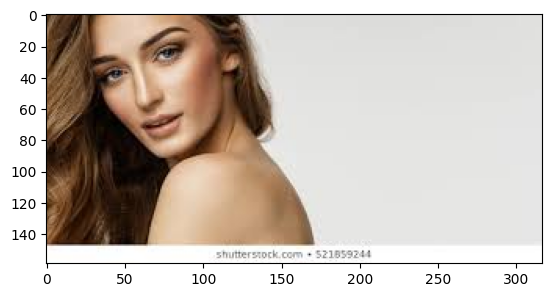

In [ ]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2975.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [ ]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/' #we r including the / at the end
#becoz to avoid error while concat it with the imf_file

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[252, 253, 252],
        [254, 254, 254],
        [243, 241, 241],
        ...,
        [120, 111, 107],
        [126, 118, 108],
        [176, 169, 156]],

       [[253, 254, 253],
        [253, 254, 254],
        [247, 246, 245],
        ...,
        [143, 138, 132],
        [122, 118, 107],
        [152, 148, 134]],

       [[253, 254, 253],
        [253, 253, 253],
        [246, 244, 243],
        ...,
        [137, 132, 126],
        [102,  99,  87],
        [107, 104,  90]],

       ...,

       [[253, 255, 250],
        [255, 255, 252],
        [216, 219, 222],
        ...,
        [ 59,  67,  82],
        [ 74,  79, 103],
        [ 78,  81, 112]],

       [[252, 253, 249],
        [255, 255, 253],
        [214, 216, 220],
        ...,
        [ 62,  69,  85],
        [ 69,  72,  94],
        [ 68,  70,  98]],

       [[252, 253, 251],
        [253, 254, 250],
        [222, 224, 226],
        ...,
        [110, 114, 132],
        [113, 115, 135],
        [109, 109, 133]]], dtype=uint8)
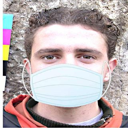

In [ ]:
data[45]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape) #(no. ,height,width,color)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
#after div by 255 we will get the values between 0 and 1

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[107,  89,  79],
        [109,  91,  80],
        [113,  94,  83],
        ...,
        [169, 127, 111],
        [164, 122, 106],
        [168, 122, 106]],

       [[108,  90,  80],
        [119, 100,  89],
        [123, 103,  92],
        ...,
        [166, 124, 108],
        [168, 129, 112],
        [175, 133, 117]],

       [[118,  99,  90],
        [132, 112, 102],
        [126, 105,  94],
        ...,
        [174, 135, 118],
        [172, 135, 117],
        [173, 134, 118]],

       ...,

       [[ 52,  50,  74],
        [ 52,  50,  74],
        [ 52,  50,  74],
        ...,
        [ 50,  51,  71],
        [ 50,  51,  71],
        [ 50,  51,  72]],

       [[ 52,  50,  73],
        [ 52,  50,  73],
        [ 52,  50,  73],
        ...,
        [ 50,  51,  71],
        [ 50,  51,  71],
        [ 50,  51,  72]],

       [[ 52,  50,  72],
        [ 52,  50,  72],
        [ 52,  50,  72],
        ...,
        [ 50,  51,  71],
        [ 50,  51,  71],
        [ 50,  51,  72]]], dtype=uint8)
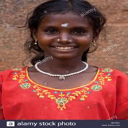

In [ ]:
X_train[45]

In [ ]:
X_train_scaled[0]

array([[[0.42745098, 0.41960784, 0.4627451 ],
        [0.44705882, 0.44313725, 0.4745098 ],
        [0.42745098, 0.41960784, 0.45490196],
        ...,
        [0.35294118, 0.38039216, 0.41960784],
        [0.35294118, 0.36862745, 0.41176471],
        [0.36470588, 0.38039216, 0.42352941]],

       [[0.43137255, 0.42352941, 0.46666667],
        [0.43529412, 0.42352941, 0.45882353],
        [0.43137255, 0.41176471, 0.44705882],
        ...,
        [0.3372549 , 0.36470588, 0.40392157],
        [0.34509804, 0.36078431, 0.40392157],
        [0.34901961, 0.36470588, 0.40784314]],

       [[0.43921569, 0.41960784, 0.4627451 ],
        [0.44313725, 0.42745098, 0.4627451 ],
        [0.48235294, 0.45882353, 0.49019608],
        ...,
        [0.34901961, 0.37254902, 0.41176471],
        [0.35686275, 0.37254902, 0.41568627],
        [0.34117647, 0.35686275, 0.4       ]],

       ...,

       [[0.18039216, 0.25882353, 0.35686275],
        [0.17647059, 0.25490196, 0.35294118],
        [0.18431373, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
num_of_classes = 2

model = keras.Sequential()
# filter no=32,
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
#dense is connected with the previous hidden layers
model.add(keras.layers.Flatten())
#all the standard numbers of neurons must me used like powers of 2 ...16,64,128
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
#to remove overfitting issue
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

#no. of neuron is the num_of_classes we have 2 probability 1 and 0 for mask and without mask
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

sigmoid for binary classification ,
softmax for more than 2 classes to predict

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

validation split is similar to test split to understand how the model is the performing on unknwon data on each epoch

In [ ]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 14s 32ms/step - loss: 0.4438 - acc: 0.8043 - val_loss: 0.3408 - val_acc: 0.8579
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.3010 - acc: 0.8799 - val_loss: 0.3117 - val_acc: 0.8678
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2520 - acc: 0.8988 - val_loss: 0.2445 - val_acc: 0.8777
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2094 - acc: 0.9170 - val_loss: 0.2603 - val_acc: 0.8893
Epoch 5/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1719 - acc: 0.9307 - val_loss: 0.3088 - val_acc: 0.8876


**Model Evaluation**

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 10ms/step - loss: 0.2535 - acc: 0.9040
Test Accuracy = 0.9040370583534241


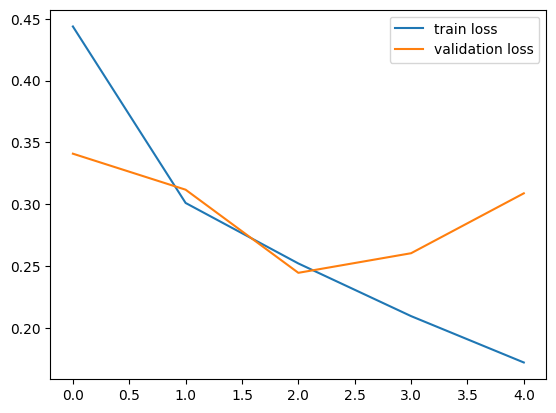

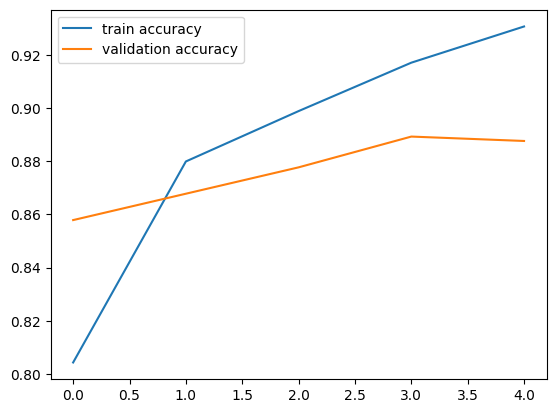

In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/data/with_mask/with_mask_1001.jpg


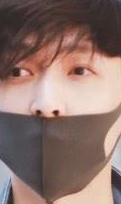

1/1 [==============================] - 0s 341ms/step
[[0.30840212 0.6313151 ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/test.jpg


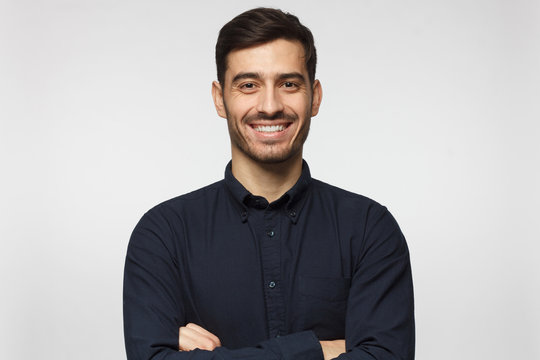

1/1 [==============================] - 0s 18ms/step
[[0.508407   0.47280827]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')